In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython import display
plt.rcParams.update({'font.size': 8})
print(matplotlib.pyplot.get_backend())

module://ipykernel.pylab.backend_inline


# Hello World mnist (tensorflow)

In [2]:
import glob
import os
import cv2
os.environ['TRIDENT_BACKEND'] = 'tensorflow'
import trident as T
from trident import *

trident 0.5.1
Using TensorFlow backend.
Image Data Format: channels_last.
Image Channel Order: rgb.
Tensorflow version:2.2.0-rc1.
Using pillow image backend.
Pillow version:6.2.1.


In [3]:
dataset=T.load_mnist('mnist') #讀取mnist數據集
dataset.image_transform_funcs=[normalize(127.5,127.5)] #在圖像預處理流程中加入正規化
data,label=dataset.next()
print(data.shape,label.shape)
print(dataset.signature)

img_list=[random.choice(dataset.get_all_data(is_shuffle=True)).reshape((28,28)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆
                        
merged_img=array2image(np.concatenate(img_list,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔


merged_img #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping class_names  in en-US   success, total 10 class names added.
(8, 28, 28) (8, 10)
OrderedDict([('data', (28, 28)), ('label', (10,))])


In [4]:
fdataset=T.load_mnist('fashion-mnist') #讀取fashion mnist數據集
dataset.image_transform_funcs=[normalize(127.5,127.5)]  #在圖像預處理流程中加入正規化

img_list2=[random.choice(fdataset.get_all_data(get_image_mode = GetImageMode.expect)) for i in range(10)]#從全體圖像數據(get_all_data())抽10筆               
merged_img2=array2image(np.concatenate(img_list2,axis=1)) #沿著x軸(axis=1)疊合後，利用array2image轉成圖檔

merged_img2 #顯示圖片

archive file is already existing, donnot need download again.
archive file is already existing, donnot need download again.
Mapping class_names  in en-US   success, total 10 class names added.


In [5]:
net1=Sequential(
    Flatten(),
    Dense(64,use_bias=False,activation='leaky_relu'),
    Dense(32,use_bias=False,activation='leaky_relu'),
    Dense(16,use_bias=False,activation='leaky_relu'),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))

In [6]:
#加入批次正規化
net2=Sequential(
    Flatten(),
    Dense(64,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))

#加入Dropout
net3=Sequential(
    Flatten(),
    Dense(64,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dropout(0.5),
    Dense(32,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(16,use_bias=False,activation=None),
    BatchNorm(),
    LeakyRelu(),
    Dense(2,use_bias=False,activation=None),
    Dense(10,use_bias=False,activation='softmax'))



In [7]:
model1=Model(input_shape=(28,28),output=net1)\
    .with_optimizer(optimizer='Ranger',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model2=Model(input_shape=(28,28),output=net2)\
    .with_optimizer(optimizer='Ranger',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)

model3=Model(input_shape=(28,28),output=net3)\
    .with_optimizer(optimizer='Ranger',lr=2e-3)\
    .with_loss(CrossEntropyLoss)\
    .with_metric(accuracy)



CrossEntropyLoss signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]
accuracy signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]
CrossEntropyLoss signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]
accuracy signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]
CrossEntropyLoss signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]
accuracy signature:[('output', TensorShape([10])), ('target', TensorShape([10]))]


In [8]:
model1.summary()
model2.summary()
model3.summary()

In [9]:
plan=TrainingPlan()\
    .add_training_item(model1)\
    .add_training_item(model2)\
    .add_training_item(model3)\
    .with_data_loader(dataset)\
    .within_minibatch_size(64)\
    .print_progress_scheduling(200,unit='batch')\

plan.only_steps(num_steps=2500,collect_data_inteval=50,keep_weights_history=True,keep_gradient_history=True)

data_feed for model 0 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
data_feed for model 1 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
data_feed for model 2 :OrderedDict([('x', 'data'), ('output', 'output'), ('target', 'label')])
model 0      Step: 13s582ms | Loss: 7.452   | accuracy: 17.188%  | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 7.45158576965332), ('CrossEntropyLoss', 7.45158576965332)])
model 1      Step: 176ms    | Loss: 7.452   | accuracy: 15.625%  | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 7.451567649841309), ('CrossEntropyLoss', 7.451567649841309)])
model 2      Step: 146ms    | Loss: 7.452   | accuracy: 6.250%   | learning rate: 2.000e-03 | epoch: 0  ( 0/2500 )
OrderedDict([('total_losses', 7.451600074768066), ('CrossEntropyLoss', 7.451600074768066)])
model 0      Step: 24s185ms | Loss: 7.430   | accuracy: 14.672%  | learning rate: 2.000e-03 | ep

True

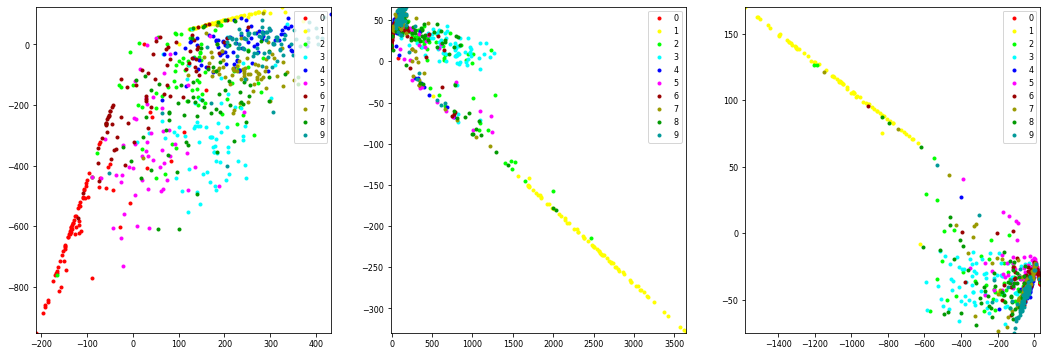

In [10]:

#plan.training_items[0].model[:4]
#plan.training_items[1].model[:11]


def centerloss_plot(plt,feat, labels,title=''):
    
    c = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff',
         '#ff00ff', '#990000', '#999900', '#009900', '#009999']
    for i in range(10):
        plt.plot(feat[labels == i, 0], feat[labels == i, 1], '.', c=c[i])
    plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], loc = 'upper right')
    plt.xlim(xmin=feat[:,0].min(),xmax=feat[:, 0].max())
    plt.ylim(ymin=feat[:,1].min(),ymax=feat[:, 1].max())
    plt.title(title)
    
    
    
fig = plt.figure(figsize=(18,6)) 
plt.clf()
plt.ion()  # is not None:
for k in [1,2,3]:
    plt.subplot(1, 3, k)
    feats_result=[]
    label_result=[]
    fm=Sequential(plan.training_items[k-1].model[:-1])#取出指定model的從第一層到倒數第二層，將它置入於Sequentiqal中
    for i,(data,label) in enumerate(dataset):
        data=to_tensor(data)
        feats=fm(data)
        feats=to_numpy(feats)
        label=np.argmax(label,-1)
        feats_result.append(feats)
        label_result.append(label)  
        if i==10:
            break

    feats_result=np.concatenate(feats_result,axis=0)
    label_result=np.concatenate(label_result,axis=0)
    plt.title('model {0}'.format(i))
    centerloss_plot(plt,feats_result,label_result)
plt.ioff() 
display.display(plt.gcf())
plt.close(fig)

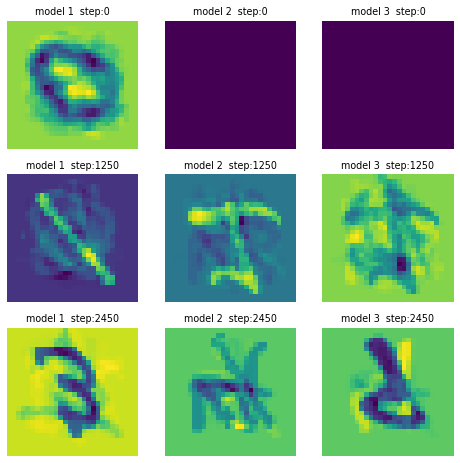

In [11]:
grad_dict={}
for i in  range(3):
    grad_dict[i]=[]
    for j in range(len(plan.training_items[i].gradients_history)):
        grad_dict[i].append(to_numpy(plan.training_items[i].gradients_history[j].value_list[0]).copy().mean(1))
        
fig =plt.figure(figsize=(8,8))
plt.clf()
plt.ion()  
for j in range(3):
    for i in [1,2,3]:
        plt.subplot(3,3, 3*j+i)
        n=[0,len(grad_dict[i-1])//2,len(grad_dict[i-1])-1][j]
        grad_grid=grad_dict[i-1][n].reshape([28,28])
        plt.pcolor(grad_grid)
        plt.title('model {0}  step:{1}'.format(i,n*50))
        plt.axis("off")
plt.ioff() 
display.display(fig)
plt.close(fig)